In [5]:
from dotenv import load_dotenv
import os

load_dotenv()

GEMINI_API = os.getenv('GEMINI_API')

In [6]:
import textwrap
import pandas as pd
import re

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _:True))


In [7]:
emotions = ['Admiração', 'Diversão', 'Raiva', 'Aborrecimento', 'Aprovação', 'Confusão', 'Curiosidade', 'Desejo', 'Decepção', 'Nojo', 'Vergonha', 'Entusiasmo', 'Medo', 'Gratidão', 'Luto', 'Alegria', 'Amor', 'Nervosismo', 'Otimismo', 'Orgulho', 'Alívio', 'Remorso', 'Tristeza', 'Surpresa', 'Saudade', 'Inveja', 'Compaixão', 'Desaprovação','Outras']

In [8]:
genai.configure(api_key=GEMINI_API)

In [6]:
# for m in genai.list_models():
#     if 'generateContent' in m.supported_generation_methods:
#         print(m.name)

In [7]:
model = genai.GenerativeModel('models/gemini-1.5-flash')

In [8]:
tweet = "Eu ainda estou me recuperando/digerindo o que aconteceu segunda! Eu já entendi, já aceitei, mas minha mente se recusa a ficar “de boa“ pq fugiu mt dos meus planos! Como diz o meme: pobre não tem 1 dia de paz!"

In [ ]:
df = pd.read_csv('./gemini_emotion_analysis.csv', sep='\t', quoting=3 , engine='python')

In [10]:
# model.count_tokens(prompt)

In [ ]:
# df['response_text'] = ''

In [ ]:
# import time

# for idx, row in df.iterrows():

#     if row['response_text'] != row['response_text']:

#         time.sleep(5)

#         prompt = f"Considerando as emoções {emotions}, quais emoções estão presentes no seguinte texto: \n \n{row['tweet']}.\n\n Responda apenas com as emoções separadas por vírgulas"

#         response = model.generate_content(prompt)

#         print(idx, response.usage_metadata)

#         df.at[idx, 'response_text'] = re.sub(r'\n', '', response.text)
#         df.to_csv('df_test_with_response.csv', index=False, sep='\t', quoting=3)


1496 prompt_token_count: 214
candidates_token_count: 9
total_token_count: 223

1497 prompt_token_count: 165
candidates_token_count: 8
total_token_count: 173

1498 prompt_token_count: 168
candidates_token_count: 9
total_token_count: 177

1499 prompt_token_count: 163
candidates_token_count: 6
total_token_count: 169

1500 prompt_token_count: 164
candidates_token_count: 7
total_token_count: 171

1501 prompt_token_count: 192
candidates_token_count: 12
total_token_count: 204

1502 prompt_token_count: 165
candidates_token_count: 6
total_token_count: 171

1503 prompt_token_count: 171
candidates_token_count: 6
total_token_count: 177

1504 prompt_token_count: 203
candidates_token_count: 12
total_token_count: 215

1505 prompt_token_count: 168
candidates_token_count: 6
total_token_count: 174

1506 prompt_token_count: 179
candidates_token_count: 8
total_token_count: 187

1507 prompt_token_count: 167
candidates_token_count: 12
total_token_count: 179

1508 prompt_token_count: 222
candidates_token_cou

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
df['predicted'] = ''
emotions_to_idx = {emotion: idx for idx, emotion in enumerate(emotions)}

print(emotions_to_idx)

for idx, row in df.iterrows():

    words = row['response_text'].split(', ')
    predicted = []

    for word in words:
        if word in emotions:
            predicted.append(emotions_to_idx[word])
        else:
            predicted.append(28)

    df.at[idx, 'predicted'] = predicted

# print(df['response_text'], df['predicted'])

{'Admiração': 0, 'Diversão': 1, 'Raiva': 2, 'Aborrecimento': 3, 'Aprovação': 4, 'Confusão': 5, 'Curiosidade': 6, 'Desejo': 7, 'Decepção': 8, 'Nojo': 9, 'Vergonha': 10, 'Entusiasmo': 11, 'Medo': 12, 'Gratidão': 13, 'Luto': 14, 'Alegria': 15, 'Amor': 16, 'Nervosismo': 17, 'Otimismo': 18, 'Orgulho': 19, 'Alívio': 20, 'Remorso': 21, 'Tristeza': 22, 'Surpresa': 23, 'Saudade': 24, 'Inveja': 25, 'Compaixão': 26, 'Desaprovação': 27, 'Outras': 28}


In [40]:
df['categoria'] = df['categoria'].str.split(',').apply(lambda x: [int(i) for i in x])
df[['predicted', 'categoria']]

TypeError: 'float' object is not iterable

In [33]:
mlb = MultiLabelBinarizer(classes=range(29))

categoria_bin = mlb.fit_transform(df['categoria'])
predicted_bin = mlb.transform(df['predicted'])

In [34]:
categoria_bin[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0])

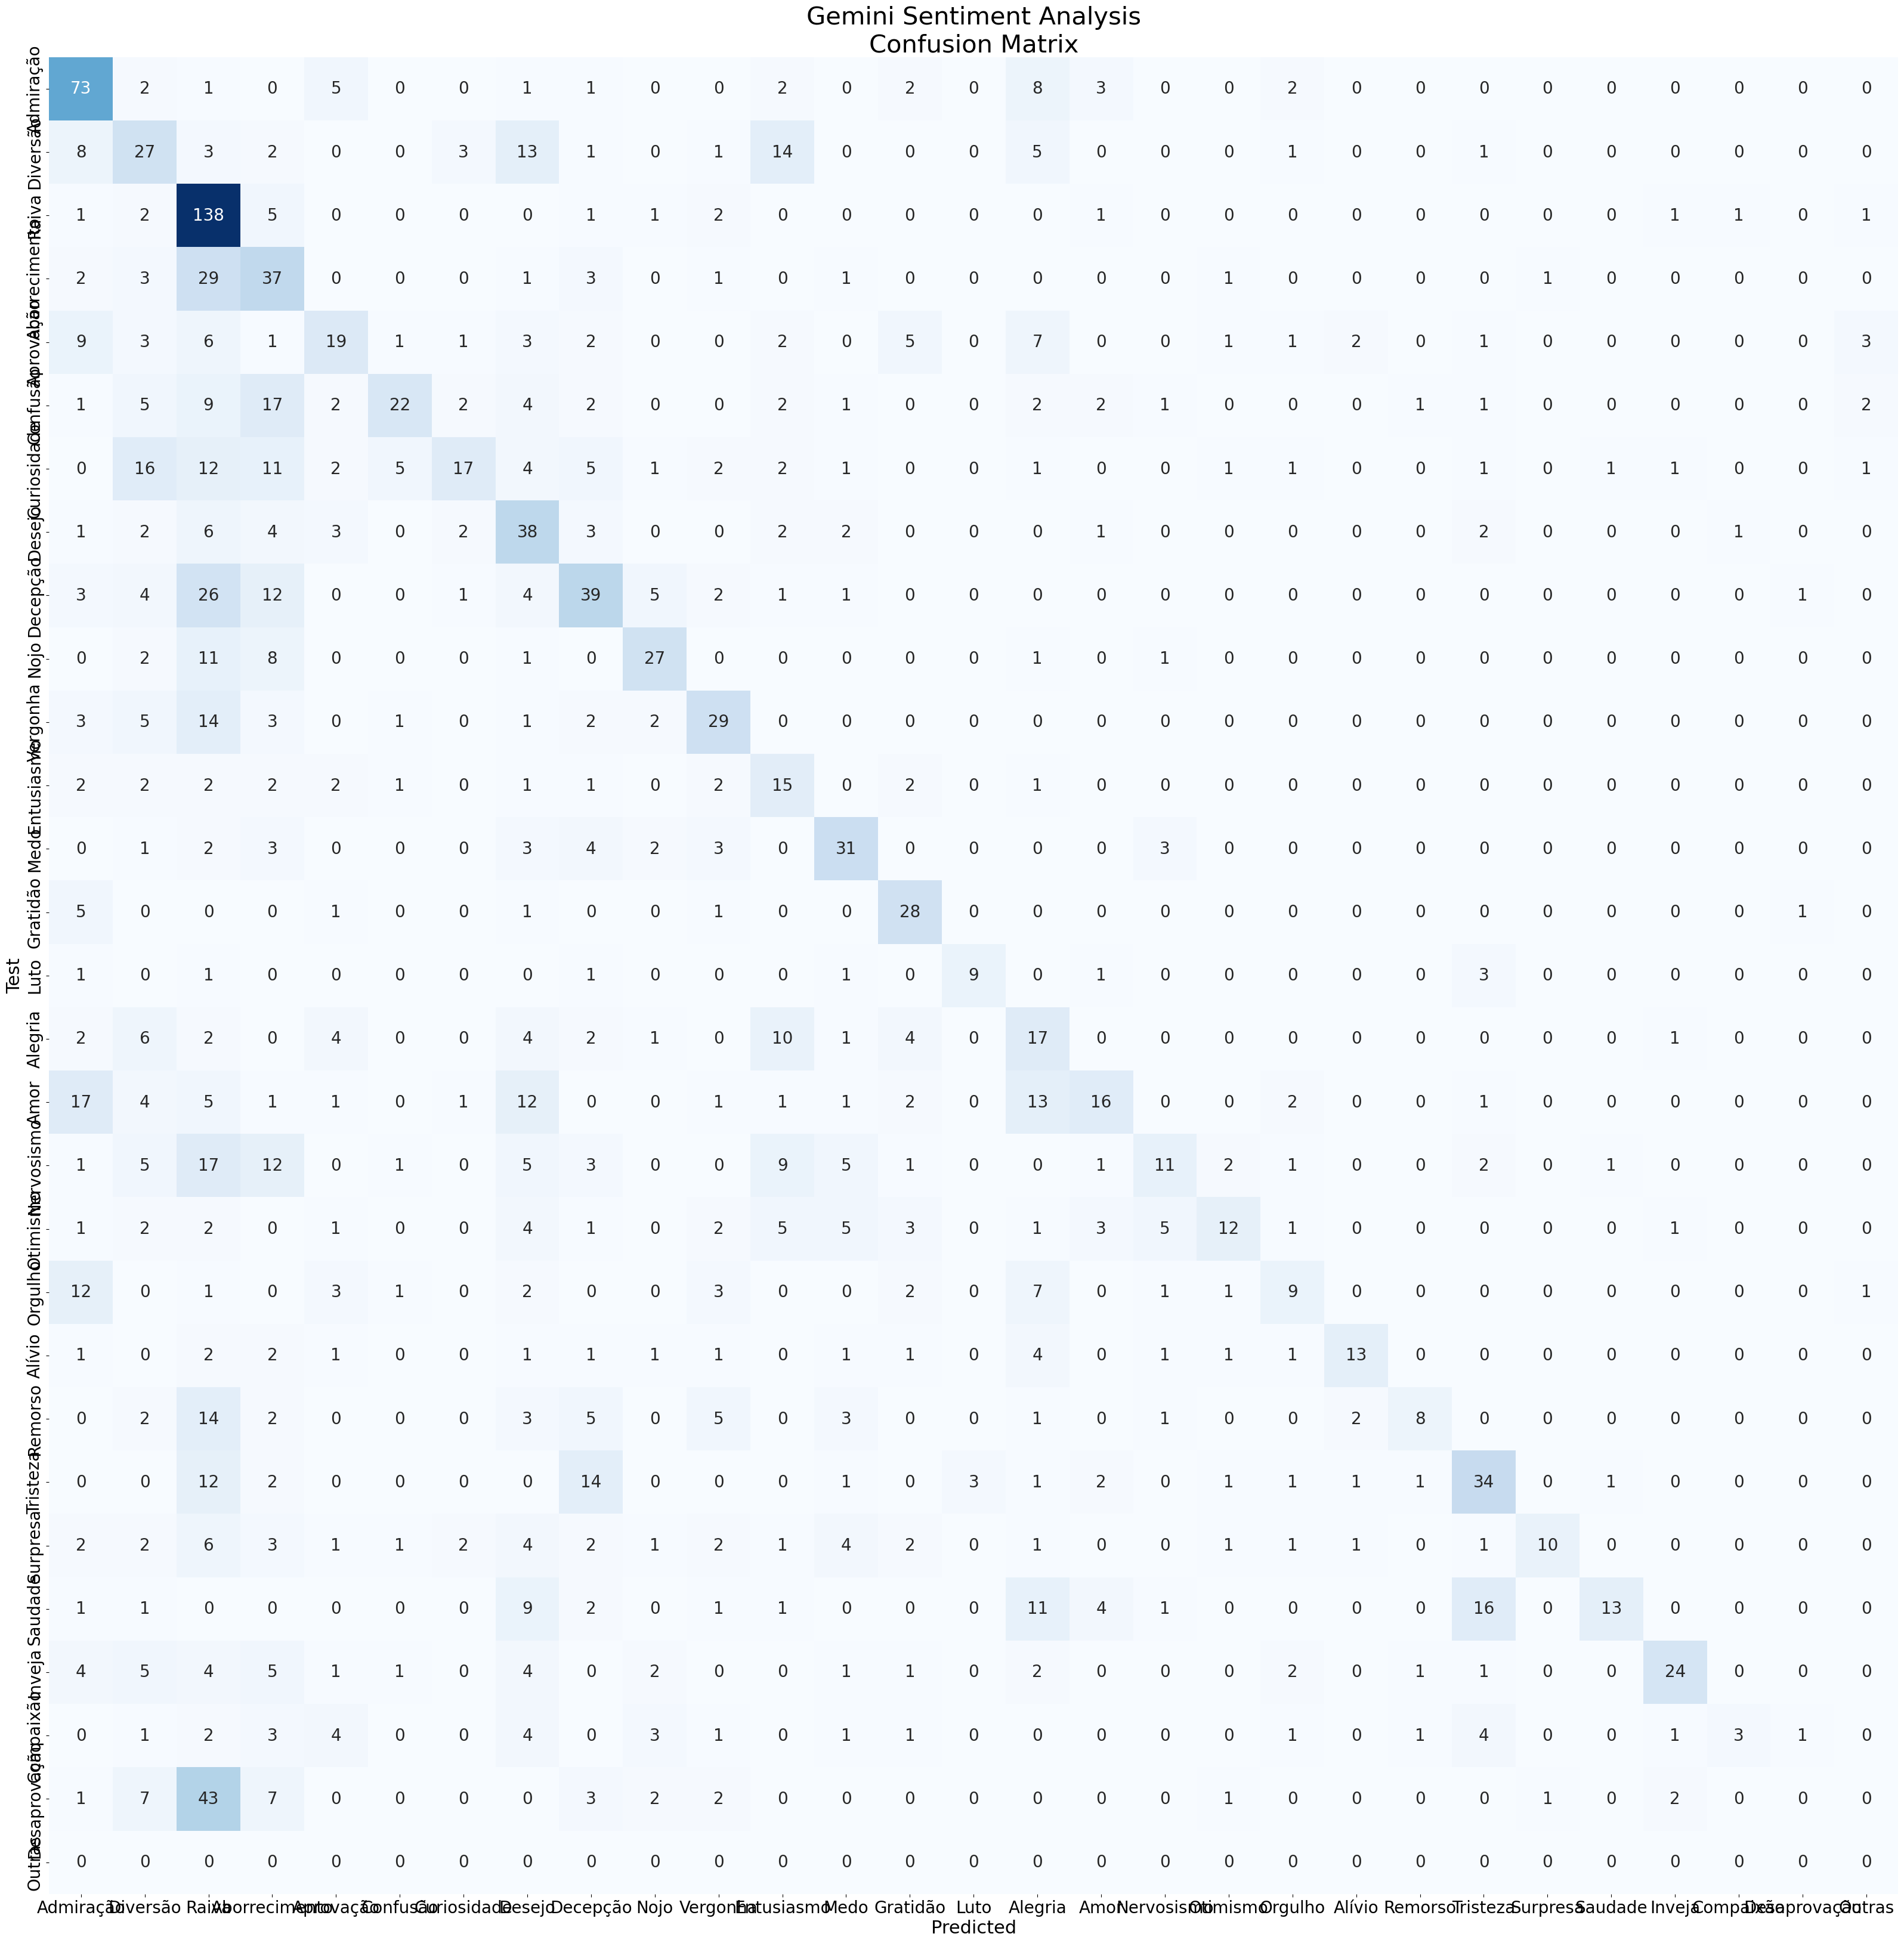

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots(figsize=(40,40))
labels=emotions
ax=sns.heatmap(confusion_matrix(categoria_bin.argmax(axis=1), predicted_bin.argmax(axis=1)), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":20})
plt.title('Gemini Sentiment Analysis\nConfusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(labels, fontsize=20) 
ax.yaxis.set_ticklabels(labels, fontsize=20)
ax.set_ylabel('Test', fontsize=22)
ax.set_xlabel('Predicted', fontsize=22)
plt.show()

In [39]:
print('\tClassification Report for Gemini:\n\n',classification_report(categoria_bin.argmax(axis=1), predicted_bin.argmax(axis=1), target_names=emotions))

	Classification Report for Gemini:

                precision    recall  f1-score   support

    Admiração       0.48      0.73      0.58       100
     Diversão       0.25      0.34      0.29        79
        Raiva       0.37      0.90      0.53       154
Aborrecimento       0.26      0.47      0.33        79
    Aprovação       0.38      0.28      0.32        67
     Confusão       0.65      0.29      0.40        76
  Curiosidade       0.59      0.20      0.30        85
       Desejo       0.30      0.57      0.39        67
     Decepção       0.40      0.39      0.40        99
         Nojo       0.56      0.53      0.55        51
     Vergonha       0.48      0.48      0.48        60
   Entusiasmo       0.22      0.45      0.30        33
         Medo       0.51      0.60      0.55        52
     Gratidão       0.52      0.76      0.62        37
         Luto       0.75      0.53      0.62        17
      Alegria       0.20      0.31      0.25        54
         Amor       0.47   

/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
